In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/Steel_industry_data.csv')
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


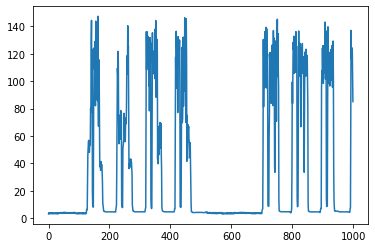

In [2]:
plt.plot(df['Usage_kWh'][:1000])

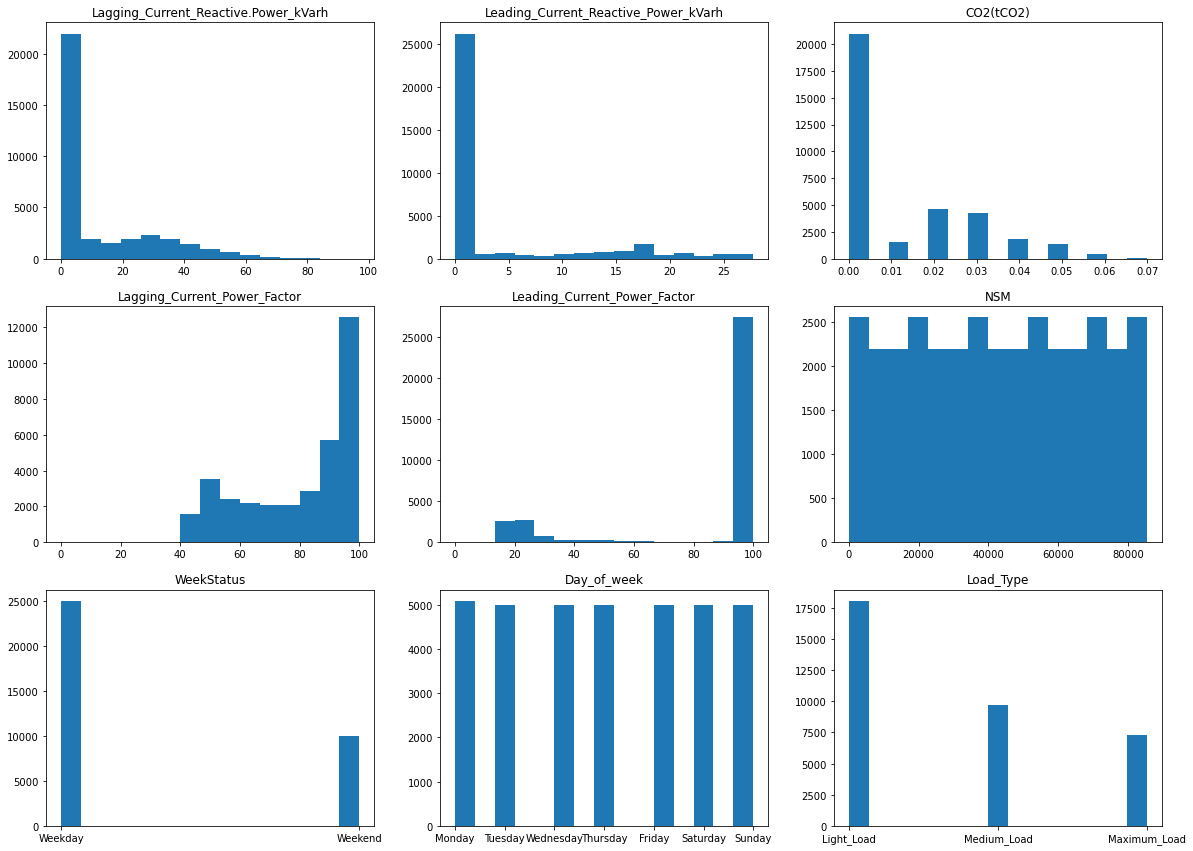

In [3]:
plt.figure(figsize=(20, 20))

for i, col in enumerate(df.drop(['date', 'Usage_kWh'], axis=1).columns):
    plt.subplot(4, 3, i+1)
    plt.hist(df[col], 15)
    plt.title(col)

In [4]:
from preproccesing import apply_enconding, get_feature_cols, train_val_test_seq, apply_sliding_window

df = get_feature_cols(apply_enconding(df))

train, val, test = train_val_test_seq(df)
print(train.shape, val.shape, test.shape)

(22425, 12) (5607, 12) (7008, 12)


In [5]:
seq_len = 20
target_size = 1
    
X_train, y_train = apply_sliding_window(train, seq_len, target_size, 'Usage_kWh')
X_val, y_val = apply_sliding_window(val, seq_len, target_size, 'Usage_kWh')
X_test, y_test = apply_sliding_window(test, seq_len, target_size, 'Usage_kWh')

print(X_train.shape, X_val.shape, X_test.shape)

(22405, 20, 12) (5587, 20, 12)


## RNN

In [6]:
from optimizers import Adam, setup_optimizers
from train import train_model
from model import RNN
from layers import MSELoss

model = RNN(12, 100)

model.optim = Adam()
loss = MSELoss
setup_optimizers(model)

best_model = train_model(model, loss, X_train, y_train, X_val, y_val, len(X_train))

Epoch 0:  Train loss: 1973.03828  Val loss: 1454.40111
Epoch 50:  Train loss: 637.76743  Val loss: 509.77344


KeyboardInterrupt: 

In [ ]:
import numpy as np

test = np.array(X_test)
pred = best_model.forward(test)

np.mean((pred - y_test)**2)